# Data Frame Avanzado

## Trabajando con Indices

In [68]:
import pandas as pd

In [81]:
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates = ['Date'])

In [82]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [88]:
stocks.set_index(['Date'], inplace = True)

In [89]:
stocks.index

DatetimeIndex(['2016-10-03', '2016-10-03', '2016-10-03', '2016-10-04',
               '2016-10-04', '2016-10-04', '2016-10-05', '2016-10-05',
               '2016-10-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [94]:
stocks.loc['2016-10-03']

,Close,Volume,Symbol
Date,,,
2016-10-03,31.50,14070500,CSCO
2016-10-03,112.52,21701800,AAPL
2016-10-03,57.42,19189500,MSFT


In [95]:
stocks.loc['20161003']

,Close,Volume,Symbol
Date,,,
2016-10-03,31.50,14070500,CSCO
2016-10-03,112.52,21701800,AAPL
2016-10-03,57.42,19189500,MSFT


In [99]:
stocks.reset_index()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


# Merge, Combine, Concat (buscarV :)

In [304]:
dfP = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'Clientes', index_col = 'Cliente')
dfP

,Nombre,Sexo,Fnac
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01


In [305]:
dfTS = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'TiposSin', index_col = 'Tipo')
dfTS

,Descripcion
Tipo,
A,Accidente
F,Fallecimiento
R,Robo


In [308]:
dfS = pd.read_excel('data\Siniestros.xlsx', index_col = 'NroSiniestro')
dfS2 = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'MasSiniestros', index_col = 'NroSiniestro')

In [311]:
dfS

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
102030,35874773,2019-01-15,M,150000,150000
453242,17477171,2019-07-03,R,10000,500
123123,35874773,2019-01-15,M,150000,150001


In [312]:
dfS2

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
123123,35874773,2019-01-15,M,150000,10
678678,17477171,2019-07-03,R,10000,20


## Concat

In [314]:
dfTodos = pd.concat([dfS, dfS2])
dfTodos

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
102030,35874773,2019-01-15,M,150000,150000
453242,17477171,2019-07-03,R,10000,500
123123,35874773,2019-01-15,M,150000,150001
123123,35874773,2019-01-15,M,150000,10
678678,17477171,2019-07-03,R,10000,20


In [315]:
pd.concat([dfS, dfS2], axis = 1)

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,,,,,,
102030,35874773.0,2019-01-15,M,150000.0,150000.0,NaN,NaT,NaN,NaN,NaN
123123,35874773.0,2019-01-15,M,150000.0,150001.0,35874773.0,2019-01-15,M,150000.0,10.0
453242,17477171.0,2019-07-03,R,10000.0,500.0,NaN,NaT,NaN,NaN,NaN
678678,NaN,NaT,NaN,NaN,NaN,17477171.0,2019-07-03,R,10000.0,20.0


## Merege

In [316]:
dfTodos2 = pd.merge(dfTodos, dfP, left_on = 'NroCliente', right_on = 'Cliente', indicator = True)
dfTodos2

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,35874773,2019-01-15,M,150000,150000,Rafael Harispe,M,1971-02-05,both
1,35874773,2019-01-15,M,150000,150001,Rafael Harispe,M,1971-02-05,both
2,35874773,2019-01-15,M,150000,10,Rafael Harispe,M,1971-02-05,both
3,17477171,2019-07-03,R,10000,500,Silvana Collazo,F,1980-01-01,both
4,17477171,2019-07-03,R,10000,20,Silvana Collazo,F,1980-01-01,both


In [317]:
dfTodos2 = pd.merge(dfTodos, dfP, left_on = 'NroCliente', right_on = 'Cliente', indicator = True)
dfTodos2

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,35874773,2019-01-15,M,150000,150000,Rafael Harispe,M,1971-02-05,both
1,35874773,2019-01-15,M,150000,150001,Rafael Harispe,M,1971-02-05,both
2,35874773,2019-01-15,M,150000,10,Rafael Harispe,M,1971-02-05,both
3,17477171,2019-07-03,R,10000,500,Silvana Collazo,F,1980-01-01,both
4,17477171,2019-07-03,R,10000,20,Silvana Collazo,F,1980-01-01,both


In [319]:
dfTodos.loc[:, ['MontoReclamado', 'MontoPago']].apply(max, axis = 1)

NroSiniestro
102030    150000
453242     10000
123123    150001
123123    150000
678678     10000
dtype: int64

In [320]:
dfTodos.loc[dfTodos.MontoPago.idxmax()]

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
123123,35874773,2019-01-15,M,150000,150001
123123,35874773,2019-01-15,M,150000,10


## Group By y agregaciones

In [322]:
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates = ['Date'])

In [323]:
sgb = stocks.groupby(['Symbol'])

In [122]:
sgb.indices

{'AAPL': array([1, 3, 8], dtype=int64),
 'CSCO': array([0, 5, 7], dtype=int64),
 'MSFT': array([2, 4, 6], dtype=int64)}

In [136]:
for g, df in sgb:
    print(g, '->>>')
    print(df)

AAPL ->>>
             Close    Volume Symbol
Date                               
2016-10-03  112.52  21701800   AAPL
2016-10-04  113.00  29736800   AAPL
2016-10-05  113.05  21453100   AAPL
CSCO ->>>
            Close    Volume Symbol
Date                              
2016-10-03  31.50  14070500   CSCO
2016-10-04  31.35  18460400   CSCO
2016-10-05  31.59  11808600   CSCO
MSFT ->>>
            Close    Volume Symbol
Date                              
2016-10-03  57.42  19189500   MSFT
2016-10-04  57.24  20085900   MSFT
2016-10-05  57.64  16726400   MSFT


In [138]:
sgb.groups

{'AAPL': DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05'], dtype='datetime64[ns]', name='Date', freq=None),
 'CSCO': DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05'], dtype='datetime64[ns]', name='Date', freq=None),
 'MSFT': DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05'], dtype='datetime64[ns]', name='Date', freq=None)}

In [140]:
sgb.get_group('AAPL')

,Close,Volume,Symbol
Date,,,
2016-10-03,112.52,21701800,AAPL
2016-10-04,113.00,29736800,AAPL
2016-10-05,113.05,21453100,AAPL


In [150]:
sgb = stocks.groupby(['Symbol', 'Date'])

In [159]:
sgb.get_group(('AAPL', '20161003'))

,Close,Volume,Symbol
Date,,,
2016-10-03,112.52,21701800,AAPL


### Agregaciones en GroubBy

In [170]:
sgb = stocks.groupby(['Symbol'])

In [172]:
sgb.max()

,Close,Volume
Symbol,,
AAPL,113.05,29736800
CSCO,31.59,18460400
MSFT,57.64,20085900


In [173]:
sgb.min()

,Close,Volume
Symbol,,
AAPL,112.52,21453100
CSCO,31.35,11808600
MSFT,57.24,16726400


In [177]:
sgba = sgb.aggregate(['max', 'min', 'mean'])
sgba

Close                        Volume                        
           max     min        mean       max       min          mean
Symbol                                                              
AAPL    113.05  112.52  112.856667  29736800  21453100  2.429723e+07
CSCO     31.59   31.35   31.480000  18460400  11808600  1.477983e+07
MSFT     57.64   57.24   57.433333  20085900  16726400  1.866727e+07

In [425]:
sgba[('Volume', 'max')] > 15000

Symbol
AAPL    True
CSCO    True
MSFT    True
Name: (Volume, max), dtype: bool

In [426]:
sgba.loc[sgba[('Volume', 'max')] > 10]

Close                        Volume                        
           max     min        mean       max       min          mean
Symbol                                                              
AAPL    113.05  112.52  112.856667  29736800  21453100  2.429723e+07
CSCO     31.59   31.35   31.480000  18460400  11808600  1.477983e+07
MSFT     57.64   57.24   57.433333  20085900  16726400  1.866727e+07

In [427]:
stocks.groupby(['Symbol', 'Date']).sum().loc[lambda df:df['Volume']>10]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [438]:
sgb.describe()

Close                                                                  \
       count        mean       std     min      25%     50%      75%     max   
Symbol                                                                         
AAPL     3.0  112.856667  0.292632  112.52  112.760  113.00  113.025  113.05   
CSCO     3.0   31.480000  0.121244   31.35   31.425   31.50   31.545   31.59   
MSFT     3.0   57.433333  0.200333   57.24   57.330   57.42   57.530   57.64   

       Volume                                                                  \
        count          mean           std         min         25%         50%   
Symbol                                                                          
AAPL      3.0  2.429723e+07  4.712444e+06  21453100.0  21577450.0  21701800.0   
CSCO      3.0  1.477983e+07  3.382156e+06  11808600.0  12939550.0  14070500.0   
MSFT      3.0  1.866727e+07  1.739571e+06  16726400.0  17957950.0  19189500.0   

                                
               75%         max  
Symbol                          
AAPL    25719300.0  29736800.0  
CSCO    16265450.0  18460400.0  
MSFT    19637700.0  20085900.0

In [190]:
grpFrame = sgb.Close.agg(['min', 'max', 'mean'])

In [191]:
grpFrame

,min,max,mean
Symbol,,,
AAPL,112.52,113.05,112.856667
CSCO,31.35,31.59,31.480000
MSFT,57.24,57.64,57.433333


### Pivot Taable, Stack y Unstack

In [376]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [377]:
pt = stocks.pivot_table(values = ['Close', 'Volume'], index = 'Symbol', columns = 'Date')
pt

Close                           Volume                      
Date   2016-10-03 2016-10-04 2016-10-05 2016-10-03 2016-10-04 2016-10-05
Symbol                                                                  
AAPL       112.52     113.00     113.05   21701800   29736800   21453100
CSCO        31.50      31.35      31.59   14070500   18460400   11808600
MSFT        57.42      57.24      57.64   19189500   20085900   16726400

In [378]:
type(pt)

pandas.core.frame.DataFrame

In [379]:
pt.loc[:,('Close', '2016-10-03')]

,Close
Date,2016-10-03
Symbol,
AAPL,112.52
CSCO,31.50
MSFT,57.42


In [380]:
pt.loc[:,(slice(None), '2016-10-03')]

,Close,Volume
Date,2016-10-03,2016-10-03
Symbol,,
AAPL,112.52,21701800
CSCO,31.50,14070500
MSFT,57.42,19189500


In [381]:
pt.loc[:,('Close', slice(None))]

Close                      
Date   2016-10-03 2016-10-04 2016-10-05
Symbol                                 
AAPL       112.52     113.00     113.05
CSCO        31.50      31.35      31.59
MSFT        57.42      57.24      57.64

In [382]:
pt2 = stocks.pivot_table(values = ['Volume'], index = 'Date', columns = 'Symbol')
pt2

Volume                    
Symbol          AAPL      CSCO      MSFT
Date                                    
2016-10-03  21701800  14070500  19189500
2016-10-04  29736800  18460400  20085900
2016-10-05  21453100  11808600  16726400

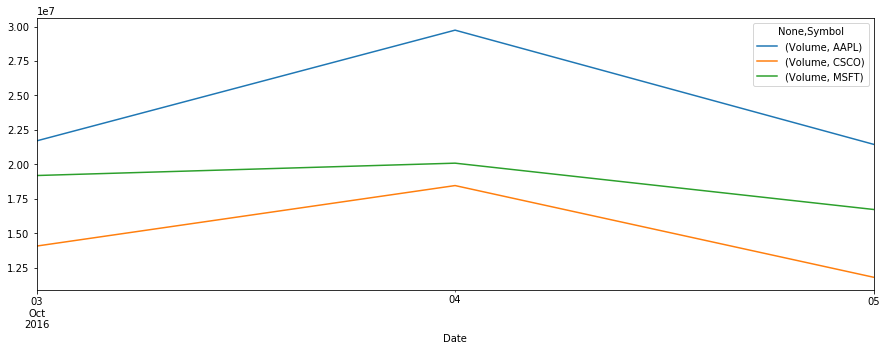

In [383]:
%matplotlib inline

pt2.plot(figsize = (15, 5))

In [455]:
pt2 = stocks.pivot_table(values = ['Close', 'Volume'], index = ['Symbol', 'Date'], aggfunc='sum')
pt2

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [456]:
pt2.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [457]:
pt2.unstack(level=0)

Close                  Volume                    
Symbol        AAPL   CSCO   MSFT      AAPL      CSCO      MSFT
Date                                                          
2016-10-03  112.52  31.50  57.42  21701800  14070500  19189500
2016-10-04  113.00  31.35  57.24  29736800  18460400  20085900
2016-10-05  113.05  31.59  57.64  21453100  11808600  16726400

In [459]:
pt2.unstack(level=1)

Close                           Volume                      
Date   2016-10-03 2016-10-04 2016-10-05 2016-10-03 2016-10-04 2016-10-05
Symbol                                                                  
AAPL       112.52     113.00     113.05   21701800   29736800   21453100
CSCO        31.50      31.35      31.59   14070500   18460400   11808600
MSFT        57.42      57.24      57.64   19189500   20085900   16726400

In [460]:
pt2.unstack(level=1).swaplevel(axis = 1)

Date,2016-10-03,2016-10-04,2016-10-05,2016-10-03,2016-10-04,2016-10-05
,Close,Close,Close,Volume,Volume,Volume
Symbol,,,,,,
AAPL,112.52,113.00,113.05,21701800,29736800,21453100
CSCO,31.50,31.35,31.59,14070500,18460400,11808600
MSFT,57.42,57.24,57.64,19189500,20085900,16726400


# Agrupaciones especiales

In [281]:
urDF = pd.read_csv('http://bit.ly/uforeports', parse_dates = ['Time'])
urDF.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [282]:
urDF.set_index(['Time', 'State'], inplace = True)

In [284]:
urDF.loc[urDF.index.get_level_values(0) > '1980-01-01','City'] \
    .groupby(
    [pd.Grouper(level = 'Time', freq = '10Y'), pd.Grouper(level = 'State')])\
    .count()

Time        State
1980-12-31  AK          1
            AL          4
            AR          3
            AZ          4
            CA         34
                     ... 
2000-12-31  VT         24
            WA       1081
            WI        238
            WV         74
            WY         45
Name: City, Length: 146, dtype: int64

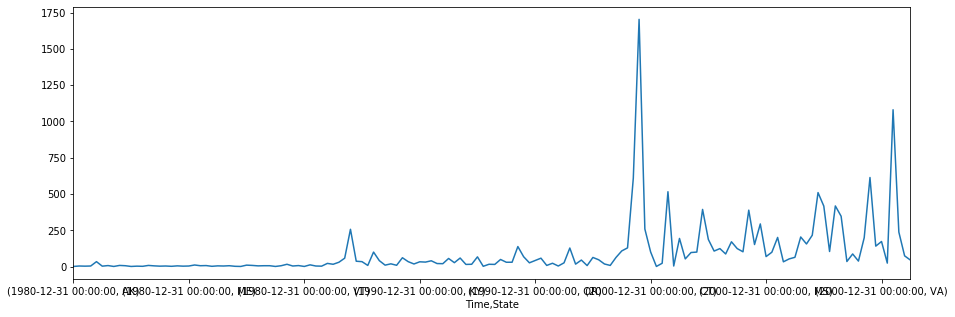

In [287]:
urDF.loc[urDF.index.get_level_values(0) > '1980-01-01','City'] \
    .groupby(
    [pd.Grouper(level = 'Time', freq = '10Y'), pd.Grouper(level = 'State')])\
    .count().plot(figsize = (15,5))

In [292]:
urDF.pivot_table(index = 'Time', aggfunc = 'count')

,City,Colors Reported,Shape Reported
Time,,,
1930-06-01 22:00:00,1,0,1
1930-06-30 20:00:00,1,0,1
1931-02-15 14:00:00,1,0,1
1931-06-01 13:00:00,1,0,1
1933-04-18 19:00:00,1,0,1
...,...,...,...
2000-12-31 21:00:00,1,1,1
2000-12-31 22:00:00,1,0,1
2000-12-31 23:00:00,3,0,2


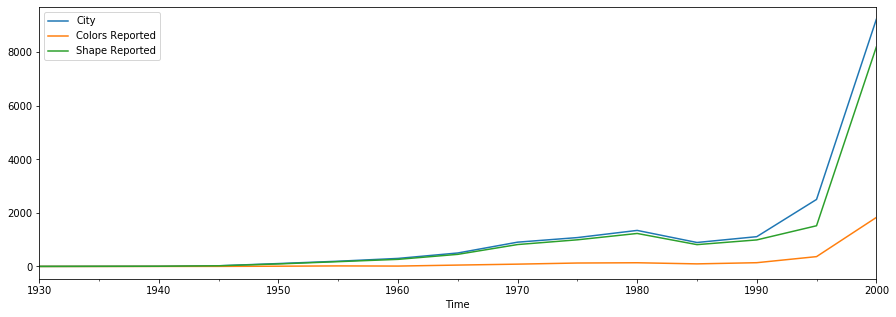

In [302]:
urDF.pivot_table(index = pd.Grouper(level = 'Time', freq = '5Y'), aggfunc = 'count').plot(figsize = (15,5))

### Empaquetando funciones

In [366]:
%load_ext autoreload
%autoreload 2
import siniestros_util as su

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [367]:
su.data_frame_siniestros()

,Nombre,Sexo,FechaNacimiento
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01
